# Classification of News Articles 

It is a notebook for multiclass classification of News articles which are having classes numbered 1 to 4, where 1 is "World News", 2 is "Sports News", 3 is "Business News" and 4 is "Science-Technology News".

I have used various models for classification of the News articles. The classification algorithms used are:-

1. Multinomial Naive Bayes
2. Decision Tree 
3. Gaussian Naive Bayes
4. Stochastic Gradient Descent Classifier
5. LGBM (light gradient boosting machine) Classifier


### Importing libraries

In [13]:
import numpy as np 
import pandas as pd 
import nltk
import string as s
import re
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from wordcloud import WordCloud

from sklearn.feature_extraction.text  import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics  import f1_score,accuracy_score
from sklearn.metrics import  confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier
from lightgbm import LGBMClassifier

In [14]:
train_data=pd.read_csv("/kaggle/input/ag-news-classification-dataset/train.csv",header=0,names=['classid','title','desc'])
test_data=pd.read_csv("/kaggle/input/ag-news-classification-dataset/test.csv",header=0,names=['classid','title','desc'])

In [15]:
train_data.head()

,classid,title,desc
0,3,Wall St. Bears Claw Back Into the Black (Reuters),"Reuters - Short-sellers, Wall Street's dwindli..."
1,3,Carlyle Looks Toward Commercial Aerospace (Reu...,Reuters - Private investment firm Carlyle Grou...
2,3,Oil and Economy Cloud Stocks' Outlook (Reuters),Reuters - Soaring crude prices plus worries\ab...
3,3,Iraq Halts Oil Exports from Main Southern Pipe...,Reuters - Authorities have halted oil export\f...
4,3,"Oil prices soar to all-time record, posing new...","AFP - Tearaway world oil prices, toppling reco..."


In [16]:
test_data.head()

,classid,title,desc
0,3,Fears for T N pension after talks,Unions representing workers at Turner Newall...
1,4,The Race is On: Second Private Team Sets Launc...,"SPACE.com - TORONTO, Canada -- A second\team o..."
2,4,Ky. Company Wins Grant to Study Peptides (AP),AP - A company founded by a chemistry research...
3,4,Prediction Unit Helps Forecast Wildfires (AP),AP - It's barely dawn when Mike Fitzpatrick st...
4,4,Calif. Aims to Limit Farm-Related Smog (AP),AP - Southern California's smog-fighting agenc...


## Splitting Data into Input and Label 

In [17]:
train_x=train_data.desc[:60000]
test_x=test_data.desc
train_y=train_data.classid[:60000]
test_y=test_data.classid

Representation of the distribution of data used for training i.e. 50% of the entire training dataset for the different classes.

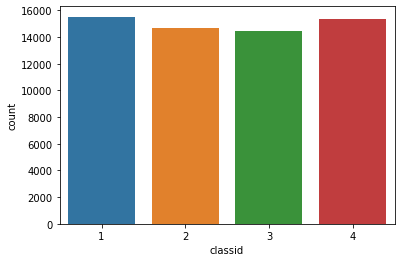

In [18]:
df=train_data[:60000]
sns.countplot(df.classid);

## WordCloud of News Articles of Different Types

### World News

In [19]:
world = df.desc[df.classid[df.classid==1].index]

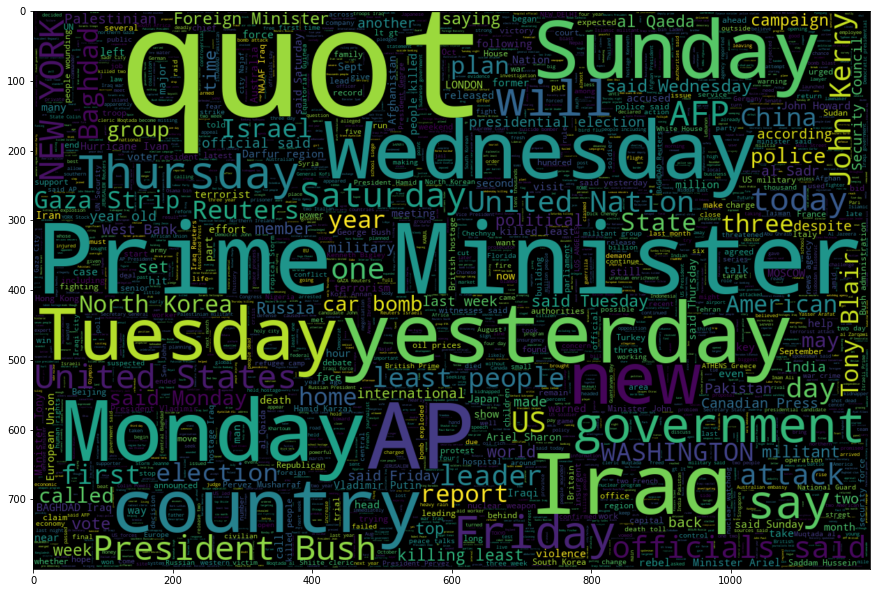

In [20]:
plt.figure(figsize = (15,20)) ;
wordcloud = WordCloud(min_font_size = 3,  max_words = 2500 , width = 1200 , height = 800).generate(" ".join(world))
plt.imshow(wordcloud,interpolation = 'bilinear');

### Sports News

In [21]:
sports = df.desc[df.classid[df.classid==2].index]

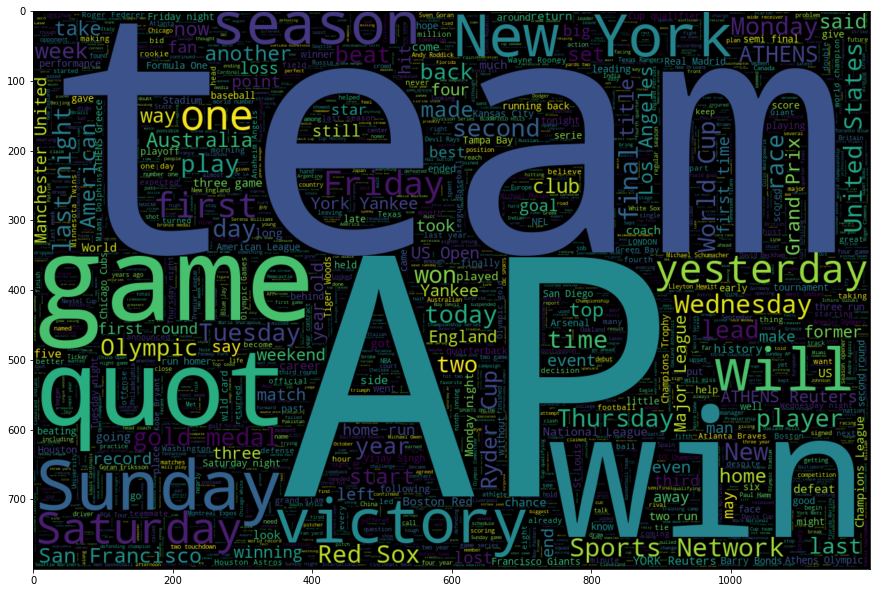

In [22]:
plt.figure(figsize = (15,20)) ;
wordcloud = WordCloud(min_font_size = 3,  max_words = 2500 , width = 1200 , height = 800).generate(" ".join(sports))
plt.imshow(wordcloud,interpolation = 'bilinear');

### Business News

In [23]:
biz = df.desc[df.classid[df.classid==3].index]

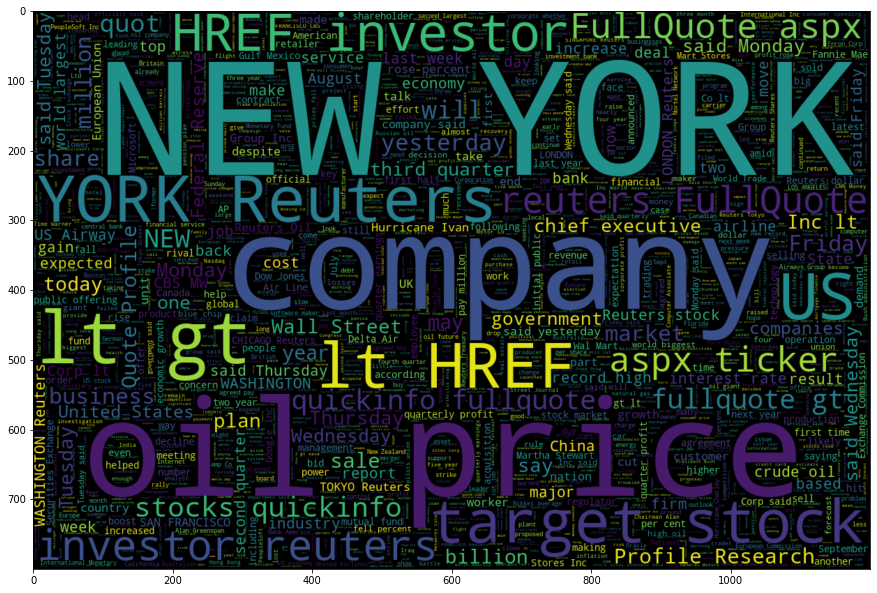

In [24]:
plt.figure(figsize = (15,20)) ;
wordcloud = WordCloud(min_font_size = 3,  max_words = 2500 , width = 1200 , height = 800).generate(" ".join(biz))
plt.imshow(wordcloud,interpolation = 'bilinear');

### Science and Technology News

In [25]:
sci = df.desc[df.classid[df.classid==4].index]

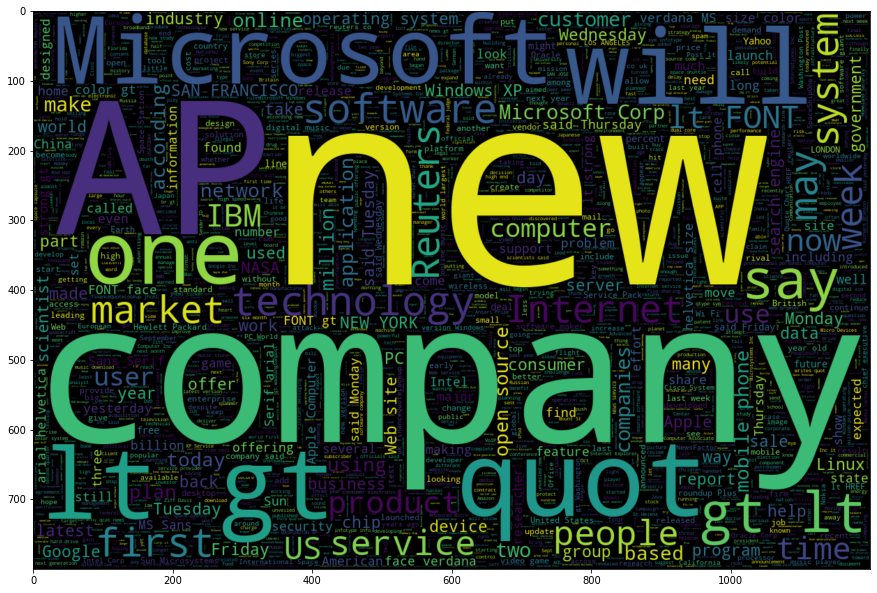

In [26]:
plt.figure(figsize = (15,20)) ;
wordcloud = WordCloud(min_font_size = 3,  max_words = 2500 , width = 1200 , height = 800).generate(" ".join(sci))
plt.imshow(wordcloud,interpolation = 'bilinear');

# Preprocessing of Data

The data is preprocessed, in NLP it is also known as text normalization. Some of the most common methods of text normalization are 
* Tokenization
* Lemmatization
* Stemming


## Tokenization of Data

In [27]:
def tokenization(text):
    lst=text.split()
    return lst
train_x=train_x.apply(tokenization)
test_x=test_x.apply(tokenization)

## Conversion of Data to Lowercase

In [28]:
def lowercasing(lst):
    new_lst=[]
    for  i in  lst:
        i=i.lower()
        new_lst.append(i) 
    return new_lst
train_x=train_x.apply(lowercasing)
test_x=test_x.apply(lowercasing)

## Removal of Punctuation Symbols

In [29]:
def remove_punctuations(lst):
    new_lst=[]
    for i in lst:
        for  j in  s.punctuation:
            i=i.replace(j,'')
        new_lst.append(i)
    return new_lst
train_x=train_x.apply(remove_punctuations) 
test_x=test_x.apply(remove_punctuations)

## Removal of Numbers(digits)

In [30]:
def remove_numbers(lst):
    nodig_lst=[]
    new_lst=[]

    for i in  lst:
        for j in  s.digits:
            i=i.replace(j,'')
        nodig_lst.append(i)
    for i in  nodig_lst:
        if  i!='':
            new_lst.append(i)
    return new_lst
train_x=train_x.apply(remove_numbers)
test_x=test_x.apply(remove_numbers)

## Removal of Stopwords

In [31]:
def remove_stopwords(lst):
    stop=stopwords.words('english')
    new_lst=[]
    for i in lst:
        if i not in stop:
            new_lst.append(i)
    return new_lst

train_x=train_x.apply(remove_stopwords)
test_x=test_x.apply(remove_stopwords)  

## Lemmatization of Data

In [32]:
lemmatizer=nltk.stem.WordNetLemmatizer()
def lemmatzation(lst):
    new_lst=[]
    for i in lst:
        i=lemmatizer.lemmatize(i)
        new_lst.append(i)
    return new_lst
train_x=train_x.apply(lemmatzation)
test_x=test_x.apply(lemmatzation)

In [33]:
train_x=train_x.apply(lambda x: ''.join(i+' ' for i in x))
test_x=test_x.apply(lambda x: ''.join(i+' '  for i in x))

## Feature Extraction
 
 Features are extracted from the dataset and TF-IDF(Term Frequency - Inverse Document Frequency) is used for this purpose.

In [34]:
tfidf=TfidfVectorizer(max_features=10000,min_df=6)
train_1=tfidf.fit_transform(train_x)
test_1=tfidf.transform(test_x)
print("No. of features extracted")
print(len(tfidf.get_feature_names()))
print(tfidf.get_feature_names()[:20])

train_arr=train_1.toarray()
test_arr=test_1.toarray()

No. of features extracted
10000
['aa', 'aapl', 'aaron', 'ab', 'ababa', 'abandon', 'abandoned', 'abandoning', 'abarrel', 'abbas', 'abbey', 'abc', 'abducted', 'abduction', 'abductor', 'abdul', 'abdullah', 'ability', 'ablaze', 'able']


# Training of Model

### Model 1- Multinomial Naive Bayes

In [35]:
NB_MN=MultinomialNB()
NB_MN.fit(train_arr,train_y)
pred=NB_MN.predict(test_arr)

print("first 20 actual labels")
print(test_y.tolist()[:20])
print("first 20 predicted labels")
print(pred.tolist()[:20])

first 20 actual labels
[3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4]
first 20 predicted labels
[3, 4, 4, 2, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3]


### Evaluation of Results

**Function for evaluation of model**

This function finds the F1-score and Accuracy of the trained model

In [36]:
def eval_model(y,y_pred):
    print("F1 score of the model")
    print(f1_score(y,y_pred,average='micro'))
    print("Accuracy of the model")
    print(accuracy_score(y,y_pred))
    print("Accuracy of the model in percentage")
    print(round(accuracy_score(y,y_pred)*100,3),"%")

**Function for Displaying the Confusion Matrix**

This function displays the confusion matrix of the model

In [37]:
def confusion_mat(color):
    cof=confusion_matrix(test_y, pred)
    cof=pd.DataFrame(cof, index=[i for i in range(1,5)], columns=[i for i in range(1,5)])
    sns.set(font_scale=1.5)
    plt.figure(figsize=(8,8));

    sns.heatmap(cof, cmap=color,linewidths=1, annot=True,square=True, fmt='d', cbar=False,xticklabels=['World','Sports','Business','Science'],yticklabels=['World','Sports','Business','Science']);
    plt.xlabel("Predicted Classes");
    plt.ylabel("Actual Classes");
    

In [38]:
eval_model(test_y,pred)
    
a=round(accuracy_score(test_y,pred)*100,3)

F1 score of the model
0.8814473684210526
Accuracy of the model
0.8814473684210526
Accuracy of the model in percentage
88.145 %


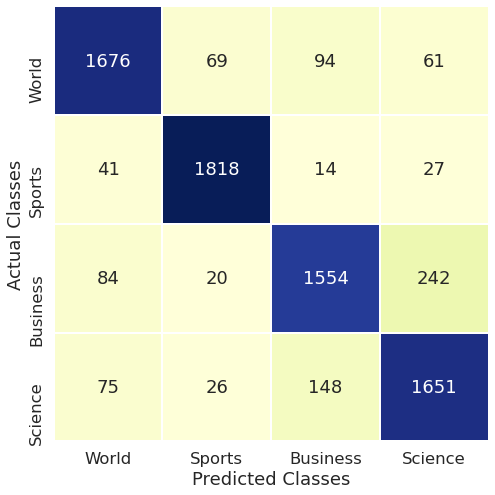

In [39]:
confusion_mat('YlGnBu')

### Model 2 - Decision Tree Classifier

In [40]:
DT=DecisionTreeClassifier()
DT.fit(train_arr,train_y)
pred=DT.predict(test_arr)

print("first 20 actual labels")
print(test_y.tolist()[:20])
print("first 20 predicted labels")
print(pred.tolist()[:20])

first 20 actual labels
[3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4]
first 20 predicted labels
[3, 4, 4, 4, 1, 4, 4, 4, 1, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3]


### Evaluation of Results

In [41]:
eval_model(test_y,pred)
    
b=round(accuracy_score(test_y,pred)*100,3)


F1 score of the model
0.7713157894736842
Accuracy of the model
0.7713157894736842
Accuracy of the model in percentage
77.132 %


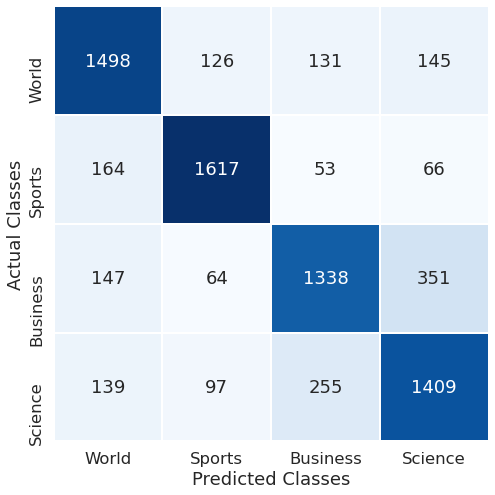

In [42]:
confusion_mat('Blues')

### Model 3 - Gaussian Naive Bayes

In [43]:
NB=GaussianNB()
NB.fit(train_arr,train_y)
pred=NB.predict(test_arr)

### Evaluation of Results

In [44]:
eval_model(test_y,pred)
    
c=round(accuracy_score(test_y,pred)*100,3)

F1 score of the model
0.7963157894736842
Accuracy of the model
0.7963157894736842
Accuracy of the model in percentage
79.632 %


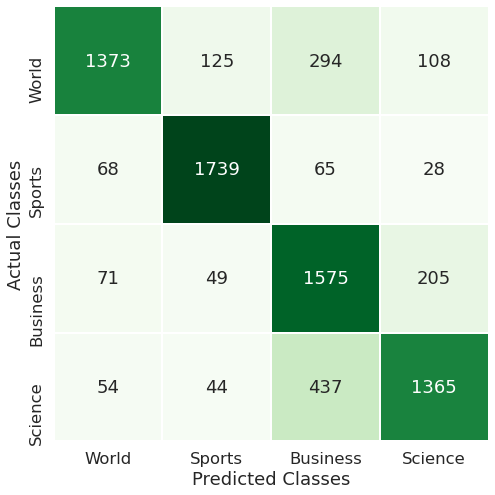

In [45]:
confusion_mat('Greens')

### Model 4 - Stochastic Gradient Descent Classifier

In [46]:
SGD=SGDClassifier()
SGD.fit(train_arr,train_y)
pred=SGD.predict(test_arr)

### Evaluation of Model

In [47]:
eval_model(test_y,pred)
    
d=round(accuracy_score(test_y,pred)*100,3)

F1 score of the model
0.8875
Accuracy of the model
0.8875
Accuracy of the model in percentage
88.75 %


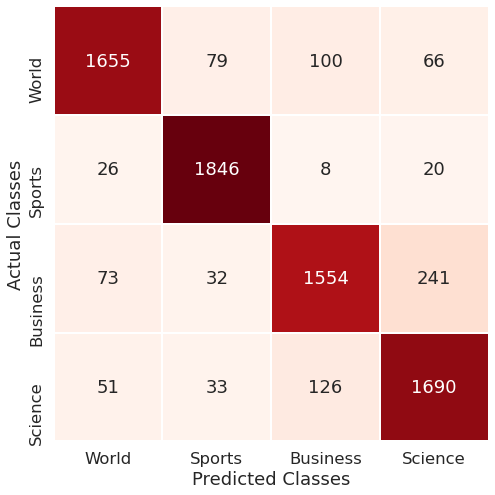

In [48]:
confusion_mat('Reds')

### Model 5 - Light Gradient Boosting Classifier

In [49]:
lgbm=LGBMClassifier()
lgbm.fit(train_arr,train_y)
pred=lgbm.predict(test_arr)

### Evaluation of Model

In [50]:
eval_model(test_y,pred)

e=round(accuracy_score(test_y,pred)*100,3)

F1 score of the model
0.8622368421052632
Accuracy of the model
0.8622368421052632
Accuracy of the model in percentage
86.224 %


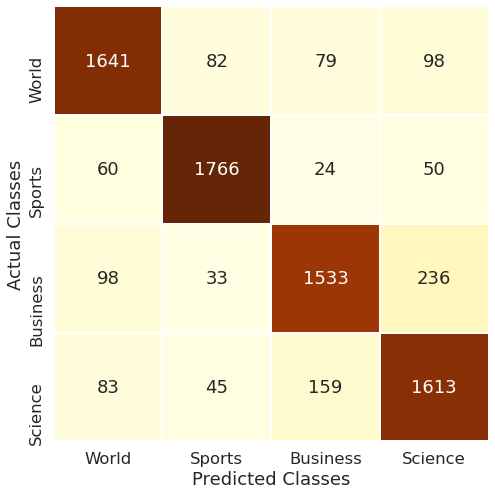

In [51]:
confusion_mat('YlOrBr')

## Comparison of Accuracies of Different Models

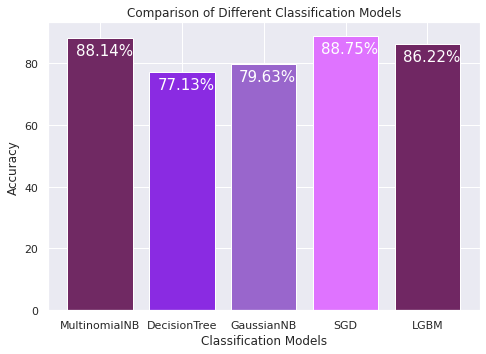

In [52]:
sns.set()
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
Models = ['MultinomialNB', 'DecisionTree', 'GaussianNB', 'SGD','LGBM']
Accuracy=[a,b,c,d,e]
ax.bar(Models,Accuracy,color=['#702963','#8a2be2','#9966cc','#df73ff','#702763']);
for i in ax.patches:
    ax.text(i.get_x()+.1, i.get_height()-5.5, str(round(i.get_height(),2))+'%', fontsize=15, color='white')
plt.title('Comparison of Different Classification Models');
plt.ylabel('Accuracy');
plt.xlabel('Classification Models');

plt.show();